<a href="https://colab.research.google.com/github/icaro-bezerra/projeto-01/blob/main/notebooks/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de Dados

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("database.db")

In [10]:
query = """
  SELECT
    *
  FROM flight_activity fa
    LEFT JOIN flight_loyalty_history fl
  ON (fa.loyalty_number = fl.loyalty_number)
"""
df = pd.read_sql_query(query, conn)
df

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('flight_activity',), ('flight_loyalty_history',)]


# 2.0 Exercicios

In [3]:
query = """
  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked
  FROM flight_activity fa
  WHERE
    fa.flights_booked > 3
"""
df.tail()


,loyalty_number,year,month,flights_booked
163091,999498,2018,12,17
163092,999524,2018,12,11
163093,999550,2018,12,15
163094,999589,2018,12,14
163095,999631,2018,12,11


In [ ]:
query = """
  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM flight_activity fa
"""
df


,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100018,2017,1,3,3,1521,152.0
1,100102,2017,1,10,14,2030,203.0
2,100140,2017,1,6,6,1200,120.0
3,100214,2017,1,0,0,0,0.0
4,100272,2017,1,0,0,0,0.0
...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0.0
405620,999911,2018,12,0,0,0,0.0
405621,999940,2018,12,3,3,1233,123.0
405622,999982,2018,12,0,0,0,0.0


In [ ]:
query = """
  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM flight_activity fa
  WHERE
    fa.distance > 2000
"""
df

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100102,2017,1,10,14,2030,203.0
1,100550,2017,1,3,3,2037,203.0
2,863070,2017,9,8,15,4245,424.0
3,100753,2017,1,8,12,3264,326.0
4,100816,2017,1,9,10,2340,234.0
...,...,...,...,...,...,...,...
122207,999272,2018,12,12,20,3460,346.0
122208,999498,2018,12,17,17,2754,275.0
122209,999550,2018,12,15,15,2985,298.0
122210,999589,2018,12,14,14,4690,469.0


In [ ]:
query = """
  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM flight_activity fa
  WHERE
    fa.distance > 2000
  AND
    fa.month = 9
"""
df

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,863070,2017,9,8,15,4245,424.0
1,691626,2018,9,8,15,4245,424.0
2,444931,2017,9,11,18,4428,442.0
3,409051,2018,9,11,18,4428,442.0
4,975387,2018,9,13,18,4428,442.0
...,...,...,...,...,...,...,...
10220,991442,2017,9,8,15,3255,325.0
10221,991638,2017,9,2,3,3387,338.0
10222,997370,2017,9,2,2,2086,208.0
10223,997710,2017,9,9,9,3285,328.0


In [ ]:
query = """
  SELECT
    fa.loyalty_number,
    fa.year,
    fa.month,
    fa.flights_booked,
    fa.total_flights,
    fa.distance,
    fa.points_accumulated
  FROM flight_activity fa
  WHERE
    fa.distance > 2000
  OR
    fa.points_accumulated < 100
"""
df

,loyalty_number,year,month,flights_booked,total_flights,distance,points_accumulated
0,100102,2017,1,10,14,2030,203.0
1,100214,2017,1,0,0,0,0.0
2,100272,2017,1,0,0,0,0.0
3,100301,2017,1,0,0,0,0.0
4,100364,2017,1,0,0,0,0.0
...,...,...,...,...,...,...,...
344144,999891,2018,12,0,0,0,0.0
344145,999902,2018,12,0,0,0,0.0
344146,999911,2018,12,0,0,0,0.0
344147,999982,2018,12,0,0,0,0.0


In [ ]:
query = """
  SELECT
    *
  FROM flight_loyalty_history fl

  WHERE
    fl.loyalty_card = 'Star'
"""
df

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
7633,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
7634,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
7635,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [ ]:
query = """
  SELECT
    *
  FROM flight_activity fa
"""
df.head()


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


# 3.0 Inspecionando os Dados


In [ ]:
df.shape[0]

405624

In [ ]:
df.shape[1]

7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loyalty_number      405624 non-null  int64  
 1   year                405624 non-null  int64  
 2   month               405624 non-null  int64  
 3   flights_booked      405624 non-null  int64  
 4   total_flights       405624 non-null  int64  
 5   distance            405624 non-null  int64  
 6   points_accumulated  405624 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 21.7 MB


In [ ]:
df['distance'].sum( )

490350765

# 4.0 Preparação de Dados

In [13]:
nullByColumn = df.isna().sum()
nullByColumn

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
loyalty_number                      0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

In [32]:
import numpy as np
# df.info()
# num_columns = df.select_dtypes(include=np.number).keys()

num_columns = ['year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance',
                  'points_accumulated', 'salary', 'clv', 'loyalty_card']

num_columns = df.loc[:,num_columns]
clean_data = num_columns.dropna()
clean_data.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [33]:
clean_data.shape[0]

302952

# 5.0 Treino de Modelo


In [59]:
from sklearn import tree as tr

X_attributes = clean_data.drop(columns = 'loyalty_card')
Y_labels = clean_data['loyalty_card']

# algo definition
model = tr.DecisionTreeClassifier(max_depth=7)

model.fit(X_attributes, Y_labels)

DecisionTreeClassifier(max_depth=7)

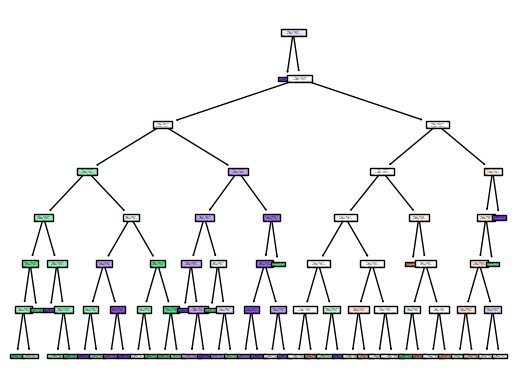

In [47]:
tr.plot_tree(model, filled = True);

# 6.0 Apresentando Resultado

In [57]:
sample = X_attributes.sample()

In [60]:
model.predict_proba(sample)

array([[0.31227036, 0.34962337, 0.33810627]])